In [5]:
from numpy import *

In [6]:
def loadDataSet(fileName):
    numFeat = len(open(fileName).readline().split('\t')) - 1
    dataMat = []
    labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = []
        curLine = line.strip().split('\t')
        for i in range(numFeat):
            lineArr.append(float(curLine[i]))
        dataMat.append(lineArr)
        labelMat.append(float(curLine[-1]))
    return dataMat, labelMat

In [7]:
def ridgeRegres(xMat, yMat, lam=0.2):
    xTx = xMat.T * xMat
    denom = xTx + eye(shape(xMat)[1]) * lam
    
    if linalg.det(denom) == 0.0:
        print("This matrix is singular")
        return
    
    ws = denom.I * (xMat.T * yMat)
    return ws

In [8]:
def ridgeTest(xArr, yArr):
    xMat = mat(xArr)
    yMat = mat(yArr).T
    yMean = mean(yMat, 0)
    yMat = yMat - yMean
    xMean = mean(xMat, 0)
    xVar = var(xMat, 0)
    xMat = (xMat - xMean) / xVar
    numTestPts = 30
    wMat = zeros((numTestPts, shape(xMat)[1]))
    for i in range(numTestPts):
        ws = ridgeRegres(xMat, yMat, exp(i-10))
        wMat[i, :] = ws.T
    return wMat

In [9]:
abx, aby = loadDataSet('abalone.txt')

In [10]:
ridgeWeights = ridgeTest(abx, aby)

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

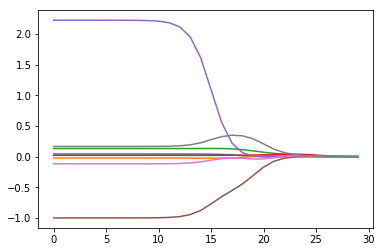

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ridgeWeights)
plt.show()